In [1]:
#This code process a set of bias fits files and makes one large master bias file. This will be used to reduce an image.
import numpy as np

# Set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

from astropy.io import fits
from astropy.utils.data import download_file

import os
import glob
import time
from matplotlib.colors import LogNorm
from IPython import display
from IPython.display import clear_output

import random


plt.rcParams.update({'font.size':15})

In [2]:
#Getting all the images
image_list = []
n = 0

#filepath = 'Data\\Bias\\'
#filepath = "Data\\Elektra_Bias_Dark\\Run 9 (-16C)\\"
#filepath = "C:\\Users\Public\\Documents\\DATA\\2022_03_20\\Bias\\"

#filepath = "C:\\Users\\Public\\Documents\\DATA\\2022_12_06\\RZ_Cep\\Bias\\"

#filepath = "..\\..\\OneDrive - University of Bath\\BPO_Data\\RZ_Cep\\Bias\\"

filepath = '' #This can be done if the fits files are in the sam file as the notebook - much easier to find and load up the files


for file in glob.glob(filepath+"Bias*.fits*"):
    image_list.append(file)
    n=n+1
print("\n".join(image_list))

Bias_0.000032_secs_001.fits
Bias_0.000032_secs_002.fits
Bias_0.000032_secs_003.fits
Bias_0.000032_secs_004.fits
Bias_0.000032_secs_005.fits
Bias_0.000032_secs_006.fits
Bias_0.000032_secs_007.fits
Bias_0.000032_secs_008.fits
Bias_0.000032_secs_009.fits
Bias_0.000032_secs_010.fits
Bias_0.000032_secs_011.fits
Bias_0.000032_secs_012.fits
Bias_0.000032_secs_013.fits
Bias_0.000032_secs_014.fits
Bias_0.000032_secs_015.fits
Bias_0.000032_secs_016.fits
Bias_0.000032_secs_017.fits
Bias_0.000032_secs_018.fits
Bias_0.000032_secs_019.fits
Bias_0.000032_secs_020.fits
Bias_0.000032_secs_021.fits
Bias_0.000032_secs_022.fits
Bias_0.000032_secs_023.fits
Bias_0.000032_secs_024.fits
Bias_0.000032_secs_025.fits


In [3]:
image_concat = [fits.getdata(image) for image in image_list]

hdu_number = 0 # HDU means header data unit
image_hdr = [fits.getheader(image, hdu_number) for image in image_list]

In [4]:
N_images = np.shape(image_concat)
print(N_images) #shape of array, imagex X y-pixels X x-pixels
print(N_images[0]) #number of images

image_concat[0]   

(25, 3520, 4656)
25


array([[144, 128, 144, ..., 144, 112, 144],
       [144, 128, 160, ..., 112, 160, 112],
       [128, 160, 128, ..., 144,  96,  64],
       ...,
       [128, 112, 112, ..., 128, 112, 112],
       [112, 144, 112, ..., 144, 144, 128],
       [144,  96, 144, ..., 144, 144, 128]], dtype=uint16)

In [5]:
#Correcting for the ZWO camera. The camera is 12 bit but it scales to 16 bit so a 2^4 difference.
for i in range(N_images[0]):
    image_concat[i] = image_concat[i] /16

In [6]:
image_hdr[0]

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 4656 / length of data axis 1                          
NAXIS2  =                 3520 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
ROWORDER= 'TOP-DOWN'           / Row Order                                      
INSTRUME= 'ZWO CCD ASI1600MM Pro' / CCD Name                                    
TELESCOP= 'SynScan '        

In [7]:
#Making arrays of zeros to store stats about each image
image_min = np.zeros(N_images[0])
image_max = np.zeros(N_images[0])
image_mean = np.zeros(N_images[0])
image_median = np.zeros(N_images[0])
image_stdev = np.zeros(N_images[0])

Bias_0.000032_secs_025.fits
Min: 1.0
Max: 53.0
Mean: 7.257526090479538
Median 7.0
Stdev: 1.5856109996457166


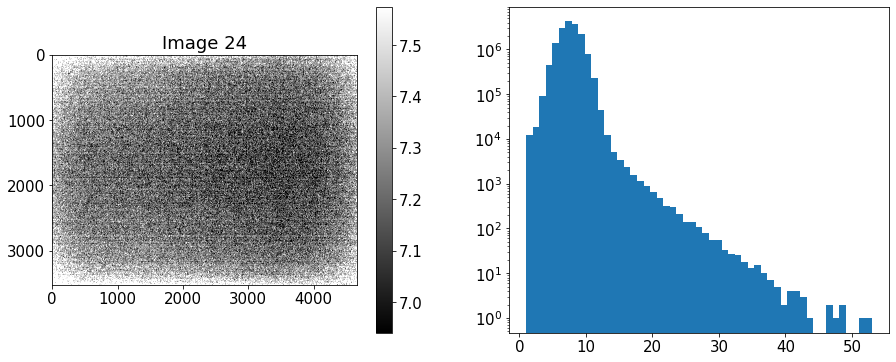

In [8]:
N_std = 0.2


for i in range(N_images[0]):
    clear_output(wait=True)

    plt.figure(figsize=(15,6))
    
    print(image_list[i])
    image_min[i] = np.min(image_concat[i])
    image_max[i] = np.max(image_concat[i])
    image_mean[i] = np.mean(image_concat[i])
    image_median[i] = np.median(image_concat[i])
    image_stdev[i] = np.std(image_concat[i])

    
    
    print('Min:', image_min[i] )
    print('Max:', image_max[i] )    
    print('Mean:', image_mean[i] )
    print('Median', image_median[i] )
    print('Stdev:', image_stdev[i] )


    
    plt.subplot(1,2,1)
    plt.imshow(image_concat[i], cmap='gray', 
               vmin= image_mean[i] - N_std*image_stdev[i], vmax=image_mean[i] + N_std*image_stdev[i]) 
    plt.title("Image "+ str(i))
    plt.colorbar()


    plt.subplot(1,2,2)
    plt.hist(image_concat[i].flatten(),bins=int(image_max[i]))
    plt.yscale('log')
  
    plt.show()
    
    time.sleep(5) #pause in secs. Make bigger if you need.

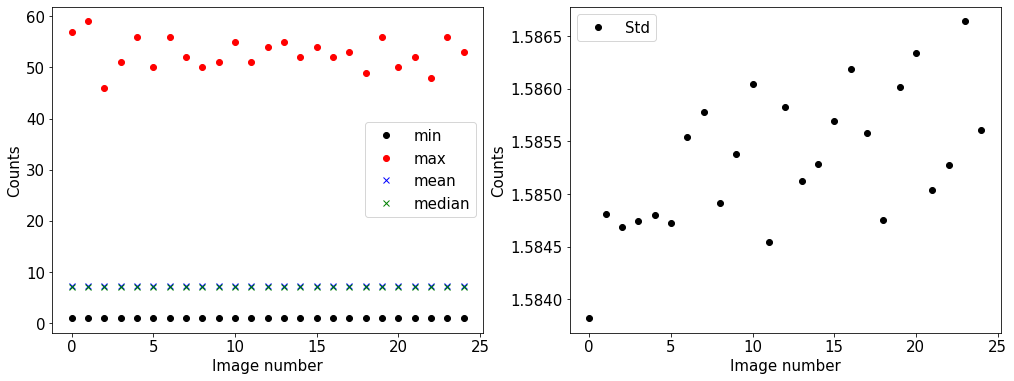

In [9]:
# Plotting some of the stats
plt.figure(figsize=(17,6))

plt.subplot(1,2,1)
plt.plot(image_min,'ko',label='min')
plt.plot(image_max,'ro',label='max')
plt.plot(image_mean, 'bx', label='mean')
plt.plot(image_median,'gx',label='median')

plt.xlabel('Image number')
plt.ylabel('Counts')

plt.legend()


plt.subplot(1,2,2)
plt.plot(image_stdev,'ko',label='Std')

plt.xlabel('Image number')
plt.ylabel('Counts')

plt.legend()



plt.show()

In [10]:
#Make a new array which is a plain 3D array of integers
all_data = np.zeros(N_images)
for i in range(N_images[0]):
    all_data[i,:,:] = image_concat[i]

In [11]:
NyPix = np.shape(all_data)[1]
NxPix = np.shape(all_data)[2]
print(NxPix,NyPix)

4656 3520


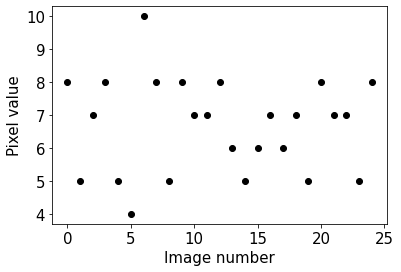

In [12]:
#Showing the varience due to noise in the bias frames:
x = int(random.randint(1, NxPix))
y = int(random.randint(1, NyPix))

plt.plot(all_data[:,y,x],'ko' )

plt.xlabel('Image number')
plt.ylabel('Pixel value')

plt.show()

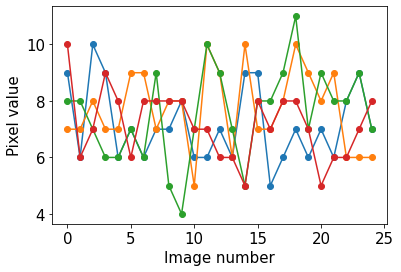

In [13]:
x_list = np.zeros(4)
y_list =  np.zeros(4)
x_list = [random.randint(1, NxPix),random.randint(1, NxPix),random.randint(1, NxPix),random.randint(1, NxPix)]
y_list = [random.randint(1, NyPix),random.randint(1, NyPix),random.randint(1, NyPix),random.randint(1, NyPix)]

for i in range(4):
    plt.plot(all_data[:,y_list[i],x_list[i]],'-o')



plt.xlabel('Image number')
plt.ylabel('Pixel value')

plt.show()

So we can see for these there is a similar distribution for each pixel. Now let's work out the standard deviation, since we have a nice 3D array this should be easy to do. Since our first dimension 0 is the image number that's what we want to compute over 

In [14]:
pixels_std = np.std(all_data, axis=0)

In [15]:
#Making a new array which each entry is the standard deviation of the flat divided by the number of flat images pixel by pixel:
np.shape(pixels_std)

(3520, 4656)

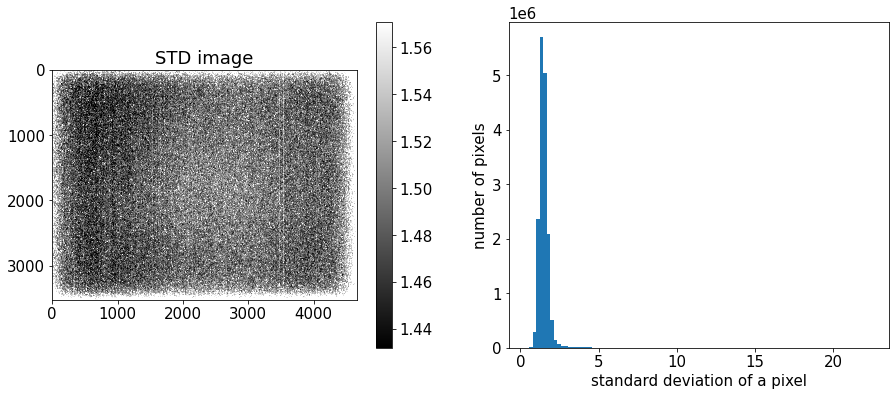

In [16]:
plt.figure(figsize=(15,6))

std_mean = np.mean(pixels_std)
std_std = np.std(pixels_std)

plt.subplot(1,2,1)
plt.imshow(pixels_std, cmap='gray',
           vmin= std_mean - N_std*std_std, vmax=std_mean + N_std*std_std)
plt.title("STD image")
plt.colorbar()

plt.subplot(1,2,2)
plt.hist(pixels_std.flatten(),bins=100)
plt.xlabel('standard deviation of a pixel')
plt.ylabel('number of pixels')


plt.show()

In [17]:
#Computing overall uncertainty in the raw bias value and the median:
Uncertainty_bias_raw = np.median(pixels_std)
print(Uncertainty_bias_raw)
#The read noise should be 1.7 counts according to the ZWO camera manual
#For short time exposures the dark current can be zero and the noise is equal to the read noise

1.4675149062275312


In [18]:
print('Read uncertainty: {0:.2f} counts'.format(Uncertainty_bias_raw))

Read uncertainty: 1.47 counts


In [19]:
master_bias = np.mean(all_data, axis=0)

Min: 4.0
Max: 28.92
Mean: 7.257558878084966
Median 7.24
Stdev: 0.3713808000529168


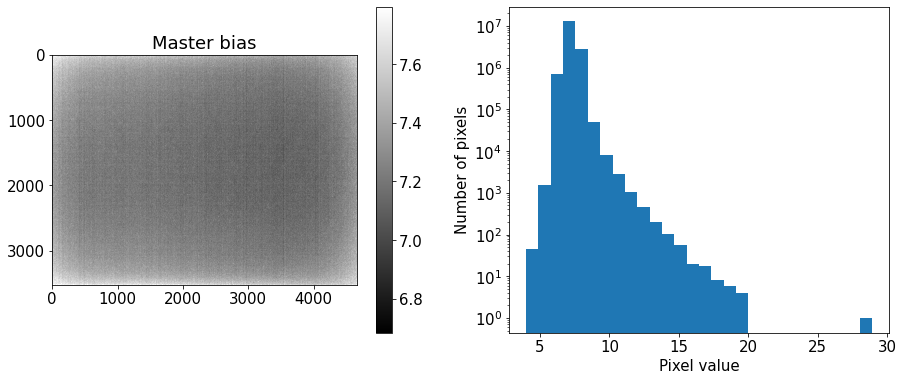

In [20]:
#Combing the bias images to produce master-bias to reduce the uncertainty by root N where N is the number of images:
plt.figure(figsize=(15,6))
            
    
N_std = 1.5
    
print('Min:', np.min(master_bias) )
print('Max:', np.max(master_bias)  )    
print('Mean:', np.mean(master_bias)  )
print('Median', np.median(master_bias)  )
print('Stdev:', np.std(master_bias)  )


    
plt.subplot(1,2,1)
plt.imshow(master_bias, cmap='gray', 
               vmin= np.median(master_bias) - N_std*np.std(master_bias), vmax=np.median(master_bias) + N_std*np.std(master_bias)) 
plt.title('Master bias')
plt.colorbar()


plt.subplot(1,2,2)
plt.hist(master_bias.flatten(),bins= int(np.max(master_bias)))
plt.yscale('log')
plt.xlabel('Pixel value')
plt.ylabel('Number of pixels')
  
plt.show()

In [21]:
#Making the file
outfile = filepath+'master_bias.fits'

hdu = fits.PrimaryHDU(master_bias)
hdu.writeto(outfile, overwrite=True)

Word of warning. What this simple anlaysis doesn't do is deal with hot pixels, nor cosmic rays. To do that we have to do sigma-clipping and that is beyond my simple python ability. So at this stage we should turn to ccdproc. But at least we now have some insight into, here, Bias frames and the noise associated with them.

In [22]:
stats_data = np.zeros([N_images[0]+2,5])
stats_data[0:N_images[0],0] = image_min
stats_data[0:N_images[0],1] = image_max
stats_data[0:N_images[0],2] = image_mean
stats_data[0:N_images[0],3] = image_median
stats_data[0:N_images[0],4] = image_stdev


# Add master stats at the end
stats_data[-1,0] = np.min(master_bias)
stats_data[-1,1] = np.max(master_bias)
stats_data[-1,2] = np.mean(master_bias)
stats_data[-1,3] = np.median(master_bias)
stats_data[-1,4] = np.std(master_bias)

# Add  stats image at the end
stats_data[-2,0] = np.min(pixels_std)
stats_data[-2,1] = np.max(pixels_std)
stats_data[-2,2] = np.mean(pixels_std)
stats_data[-2,3] = np.median(pixels_std)
stats_data[-2,4] = np.std(pixels_std)

df_stats = pd.DataFrame(data=stats_data,columns=['min','max','mean','median','std'])

In [23]:
image_list.append(filepath+'std_image')
image_list.append(filepath+'master_bias.fits')

In [24]:
df_stats['filename'] = image_list

In [25]:
camera_temp = []
exposure = []
camera_filter = []

FILTER  = 'Luminance'

for n in range(N_images[0]):
    camera_temp.append(image_hdr[n]["CCD-TEMP"])
    exposure.append(image_hdr[n]["EXPTIME "])
    camera_filter.append(image_hdr[n]["FILTER "])

# need to do something for the std and master images etc.

mean_temp = np.mean(camera_temp)
mean_exposure = np.mean(exposure)


camera_temp.append(mean_temp)
camera_temp.append(mean_temp)
exposure.append(mean_exposure)
exposure.append(mean_exposure)
camera_filter.append(image_hdr[n]["FILTER "])
camera_filter.append(image_hdr[n]["FILTER "])

df_stats['Temp'] = camera_temp
df_stats['Exposure/s'] = exposure
df_stats['Filter '] = camera_filter

In [26]:
what_list = []
for i in range(N_images[0]):
    what_list.append('bias')
    
what_list.append('Std_image')
what_list.append('master')



# Make column of "what"
df_stats['what'] = what_list

In [27]:
df_stats

,min,max,mean,median,std,filename,Temp,Exposure/s,Filter,what
0,1.000000,57.000000,7.259790,7.000000,1.583823,Bias_0.000032_secs_001.fits,-20.00,0.000032,Red,bias
1,1.000000,59.000000,7.257795,7.000000,1.584808,Bias_0.000032_secs_002.fits,-20.00,0.000032,Red,bias
2,1.000000,46.000000,7.258745,7.000000,1.584688,Bias_0.000032_secs_003.fits,-20.00,0.000032,Red,bias
3,1.000000,51.000000,7.258679,7.000000,1.584741,Bias_0.000032_secs_004.fits,-20.00,0.000032,Red,bias
4,1.000000,56.000000,7.256534,7.000000,1.584799,Bias_0.000032_secs_005.fits,-20.00,0.000032,Red,bias
5,1.000000,50.000000,7.257148,7.000000,1.584721,Bias_0.000032_secs_006.fits,-20.00,0.000032,Red,bias
6,1.000000,56.000000,7.260018,7.000000,1.585538,Bias_0.000032_secs_007.fits,-20.00,0.000032,Red,bias
7,1.000000,52.000000,7.257887,7.000000,1.585781,Bias_0.000032_secs_008.fits,-20.00,0.000032,Red,bias
8,1.000000,50.000000,7.255729,7.000000,1.584917,Bias_0.000032_secs_009.fits,-20.00,0.000032,Red,bias
9,1.000000,51.000000,7.258096,7.000000,1.585379,Bias_0.000032_secs_010.fits,-20.00,0.000032,Red,bias


In [28]:
df_stats.to_csv(filepath+'bias_stats.csv') #write to file.